In [69]:
import pandas as pd, matplotlib.pyplot as plt, contextily as ctx, geopandas as gpd, numpy as np, seaborn as sns

In [71]:
#Exploramos la base de datos
df = gpd.read_file("C:\\Users\\palom\\Downloads\\Rosario F.xlsx")

In [73]:
df.head(10)

,interview__key,METODO,Coord1__Latitude,Coord1__Longitude,EDAD,GENERO,INT DE VOTO X ESPACIO,RADIO
0,56-56-25-81,F2F,-32.881458,-60.695274,56 y mas,Masculino,LIBERTARIOS,820840409
1,67-96-98-06,F2F,-32.882259,-60.693571,36 a 45,Masculino,OTROS,820840410
2,24-21-01-39,F2F,-32.884731,-60.692882,56 y mas,Femenino,OTROS,820840502
3,84-96-80-81,F2F,-32.884673,-60.693464,26 a 35,Masculino,LIBERTARIOS,820840502
4,21-29-79-64,F2F,-32.918833,-60.703628,36 a 45,Femenino,NINGUNO/NOSABE,820841013
5,16-53-72-77,F2F,-32.918831,-60.701551,46 a 55,Femenino,JxC,820841014
6,33-52-26-63,F2F,-32.919319,-60.701945,56 y mas,Masculino,FdT,820841014
7,97-65-95-19,F2F,-32.919283,-60.702176,56 y mas,Femenino,FdT,820841014
8,60-33-90-60,F2F,-32.920606,-60.700574,26 a 35,Femenino,PNK,820841017
9,80-36-02-32,F2F,-32.920734,-60.703901,46 a 55,Femenino,FdT,820841017


In [75]:
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas")

El dataset tiene 372 filas y 8 columnas


In [79]:
df.info() #Información de cantidad de casos, columnas, tipos y cantidad de memoria utilizada

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   interview__key         372 non-null    object 
 1   METODO                 372 non-null    object 
 2   Coord1__Latitude       372 non-null    float64
 3   Coord1__Longitude      372 non-null    float64
 4   EDAD                   372 non-null    object 
 5   GENERO                 372 non-null    object 
 6   INT DE VOTO X ESPACIO  372 non-null    object 
 7   RADIO                  372 non-null    object 
dtypes: float64(2), object(6)
memory usage: 23.4+ KB


In [170]:
df.isna().sum() #También sirve para explorar valores nulos

interview__key           0
METODO                   0
Coord1__Latitude         0
Coord1__Longitude        0
EDAD                     0
GENERO                   0
INT DE VOTO X ESPACIO    0
RADIO                    0
dtype: int64

In [81]:
paleta = {
    "FIT": "red",             
    "FdT": "lightblue",       
    "JxC": "yellow",          
    "LIBERTARIOS": "purple",  
    "NINGUNO/NOSABE": "darkgray",  
    "OTROS": "lightgray",     
    "PNK": "darkblue"         
}

In [83]:
# Crear geometria del GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(x=df.Coord1__Longitude, y=df.Coord1__Latitude))
gdf.head()

,interview__key,METODO,Coord1__Latitude,Coord1__Longitude,EDAD,GENERO,INT DE VOTO X ESPACIO,RADIO,geometry
0,56-56-25-81,F2F,-32.881458,-60.695274,56 y mas,Masculino,LIBERTARIOS,820840409,POINT (-60.69527 -32.88146)
1,67-96-98-06,F2F,-32.882259,-60.693571,36 a 45,Masculino,OTROS,820840410,POINT (-60.69357 -32.88226)
2,24-21-01-39,F2F,-32.884731,-60.692882,56 y mas,Femenino,OTROS,820840502,POINT (-60.69288 -32.88473)
3,84-96-80-81,F2F,-32.884673,-60.693464,26 a 35,Masculino,LIBERTARIOS,820840502,POINT (-60.69346 -32.88467)
4,21-29-79-64,F2F,-32.918833,-60.703628,36 a 45,Femenino,NINGUNO/NOSABE,820841013,POINT (-60.70363 -32.91883)


In [85]:
#Establecer sistema de coordenadas Ellipsodial (4326)
gdf.set_crs(epsg=4326, inplace=True)
print(gdf.crs)

EPSG:4326


In [87]:
radios = gpd.read_file("datasets\\radios_censales_santafe.shp")
gobierno = gpd.read_file("datasets\\gobiernos_locales_marco.shp")
departamentos = gpd.read_file("datasets\\departamentos_indec.shp")

DataSourceError: datasets\radios_censales_santafe.shp: No such file or directory

In [89]:
radios.set_crs(epsg=4326, inplace=True)
gobierno.set_crs(epsg=4326, inplace=True)
departamentos.set_crs(epsg=4326, inplace=True)

NameError: name 'radios' is not defined

In [91]:
#Spatial Join
df_dep = gpd.sjoin(gdf, departamentos, how="left", predicate="within") #puntos no intersectan
df_rad = gpd.sjoin(gdf, radios, how="inner", predicate="within")
df_gob = gpd.sjoin(gdf, gobierno, how="left", predicate="within")

NameError: name 'departamentos' is not defined

In [93]:
df_rad.head()

NameError: name 'df_rad' is not defined

In [95]:
rosario  = {
    "minx": -60.75,
    "maxx": -60.55,
    "miny": -33.05,
    "maxy": -32.85
}

In [97]:
radios_ros = radios.cx[rosario["minx"]:rosario["maxx"], rosario["miny"]:rosario["maxy"]]

NameError: name 'radios' is not defined

In [99]:
radios_ros.plot()

NameError: name 'radios_ros' is not defined

NameError: name 'radios_ros' is not defined

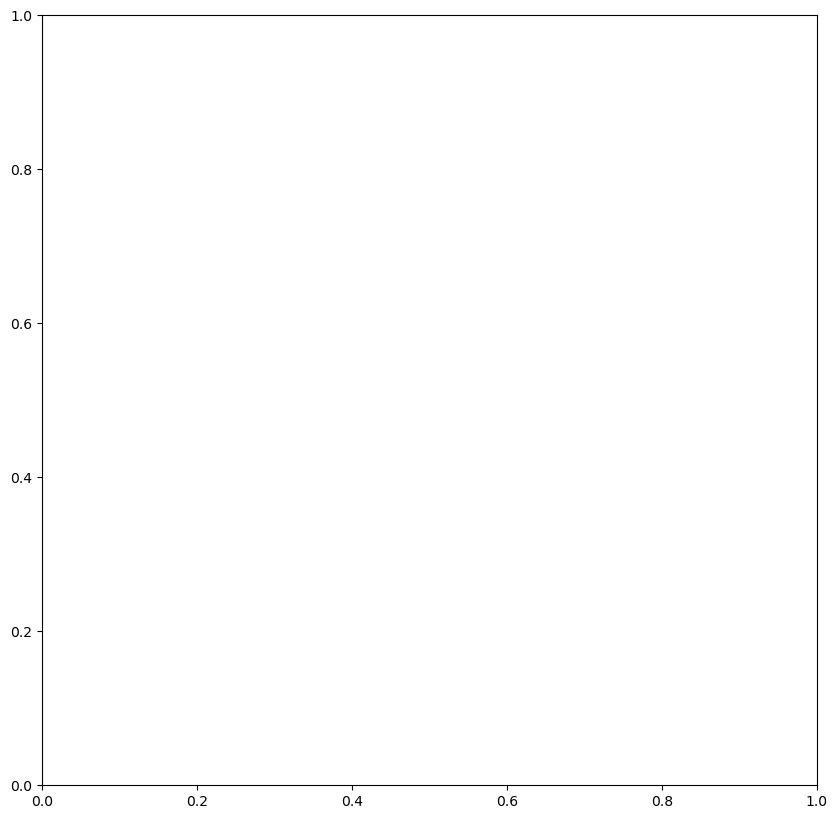

In [101]:
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar el polígono de Rosario
radios_ros.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)  # Polígono de Rosario

# Graficar los puntos de df_rad
df_rad.plot(ax=ax, column='INT DE VOTO X ESPACIO', cmap='viridis', markersize=10, legend=True)

# Agregar título y etiquetas
ax.set_title("Intención de Voto en Rosario")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Mostrar el gráfico
plt.show()

In [103]:
# Agrupar por el ID de cada radio censal y obtener el índice del partido con mayor intención de voto
df_radios_grouped = df_rad.groupby('geometry')['INT DE VOTO X ESPACIO'].agg(lambda x: x.mode()[0])

# Unir los resultados con el GeoDataFrame original (df_rad) para obtener los partidos con mayor intención de voto
df_radios_max_vote = df_rad.merge(df_radios_grouped, left_on='geometry', right_index=True, suffixes=('', '_max'))

# Disolver por el partido, de manera que cada partido tendrá su propio polígono
df_radios_dissolved = df_radios_max_vote.dissolve(by='INT DE VOTO X ESPACIO_max')


# Asignar colores a los radios censales disueltos según el partido
df_radios_dissolved['color'] = df_radios_dissolved['INT DE VOTO X ESPACIO_max'].map(paleta)

# Graficar los radios censales disueltos
fig, ax = plt.subplots(figsize=(10, 10))
df_radios_dissolved.plot(ax=ax, color=df_radios_dissolved['color'], legend=True)

# Agregar título y etiquetas
ax.set_title("Partido con Mayor Intención de Voto por Radio Censal")
ax.set_xlabel("Longitud")
ax.set_ylabel("Latitud")

# Mostrar el gráfico
plt.show()




NameError: name 'df_rad' is not defined

In [105]:
axradios.plot()

NameError: name 'axradios' is not defined

In [108]:
ax = df_gob["geometry"].plot(color='lightgray', edgecolor='black')
df_gob.plot(column='INT DE VOTO X ESPACIO', ax=ax, legend=True)
plt.show()

NameError: name 'df_gob' is not defined

In [110]:
import folium
from folium.plugins import HeatMap

In [172]:
#Mapeo de densidad de entrevistados
df = df.dropna(subset=['Coord1__Latitude', 'Coord1__Longitude']) #Elimina valores Nan.

#Creamos el mapa:
mapa = folium.Map(location=[-32.9468, -60.6393], zoom_start=12) #Centramos el mapa en Rosario según sus coordenadas
coordenadas = df[['Coord1__Latitude', 'Coord1__Longitude']].values.tolist() #Crea una lista de coordenadas que contiene latitud y longitud
HeatMap(coordenadas).add_to(mapa) #Especificamos el tipo de mapa
mapa.save("C:\\Users\\palom\\Downloads\\mapa_densidad_rosario.html") #Guardamos el mapa como archivo HTML
print("Mapa de densidad de entrevistados creado. Ábrelo con un navegador.")

Mapa de densidad de entrevistados creado. Ábrelo con un navegador.


In [116]:
#Distribución de frecuencia absoluta de intención de votos por espacio
int_voto = df['INT DE VOTO X ESPACIO'].value_counts() 
print(int_voto) 
#También nos sirve para ver si hay datos perdidos (no hay)

INT DE VOTO X ESPACIO
JxC               90
FdT               80
NINGUNO/NOSABE    72
LIBERTARIOS       57
OTROS             35
PNK               26
FIT               12
Name: count, dtype: int64


In [118]:
#Distribución de frecuencia relativa porcentual de intención de voto por espacio
int_voto_porcentaje = df['INT DE VOTO X ESPACIO'].value_counts(normalize=True) * 100 #Multiplicamos por 100 porque si no solo muestra la frecuencia relativa
print(int_voto_porcentaje) 

INT DE VOTO X ESPACIO
JxC               24.193548
FdT               21.505376
NINGUNO/NOSABE    19.354839
LIBERTARIOS       15.322581
OTROS              9.408602
PNK                6.989247
FIT                3.225806
Name: proportion, dtype: float64


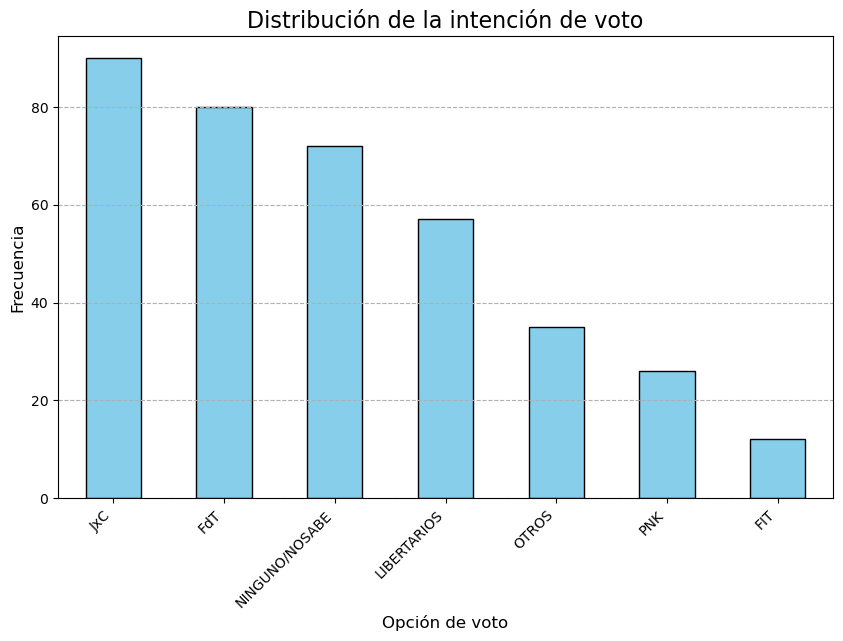

In [124]:
#Gráfico de barras
plt.figure(figsize=(10, 6))
int_voto.plot(kind='bar', color ='skyblue', edgecolor='black')
plt.title('Distribución de la intención de voto', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

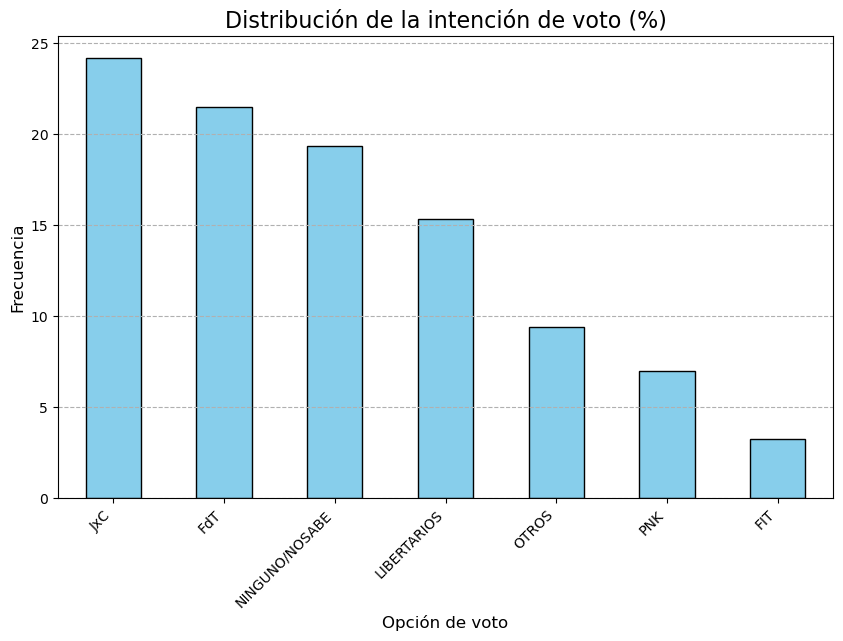

In [140]:
#Gráfico de barras porcentual
plt.figure(figsize=(10, 6))
int_voto_porcentaje.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de la intención de voto (%)', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

In [174]:
#Mapeo de densidad según intención de voto por espacio
mapa = folium.Map(location=[-32.9468, -60.6393], zoom_start=12)
categorias = df['INT DE VOTO X ESPACIO'].unique()

#Creamos una capa por categoría:
for categoria in categorias:
    mapa_espacios = df[df['INT DE VOTO X ESPACIO'] == categoria]
    coordenadas = mapa_espacios[['Coord1__Latitude', 'Coord1__Longitude']].values.tolist()
    capa = folium.FeatureGroup(name=f"Intención de voto: {categoria}")
    HeatMap(coordenadas).add_to(capa)
    capa.add_to(mapa)

# Agregamos un control de capas
folium.LayerControl().add_to(mapa)

# Guardamos el mapa como archivo HTML
mapa.save("C:\\Users\\palom\\Downloads\\mapa_densidad_espacios.html")

print("Mapa de densidad con filtros por intención de voto por espacio creado. Ábrelo con un navegador.")

Mapa de densidad con filtros por intención de voto por espacio creado. Ábrelo con un navegador.


In [51]:
#Distribución de intención de voto según género
voto_genero = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['GENERO']) 
print(voto_genero)

GENERO                 Femenino  Masculino  Otro
INT DE VOTO X ESPACIO                           
FIT                           5          5     2
FdT                          35         45     0
JxC                          42         48     0
LIBERTARIOS                  11         44     2
NINGUNO/NOSABE               40         28     4
OTROS                        19         15     1
PNK                          13         13     0


In [128]:
#Distribución de intención de voto según género (% al interior de cada espacio)
voto_genero_porcentaje = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['GENERO'], normalize='index')*100
print(voto_genero_porcentaje)

GENERO                  Femenino  Masculino       Otro
INT DE VOTO X ESPACIO                                 
FIT                    41.666667  41.666667  16.666667
FdT                    43.750000  56.250000   0.000000
JxC                    46.666667  53.333333   0.000000
LIBERTARIOS            19.298246  77.192982   3.508772
NINGUNO/NOSABE         55.555556  38.888889   5.555556
OTROS                  54.285714  42.857143   2.857143
PNK                    50.000000  50.000000   0.000000


<Figure size 1000x600 with 0 Axes>

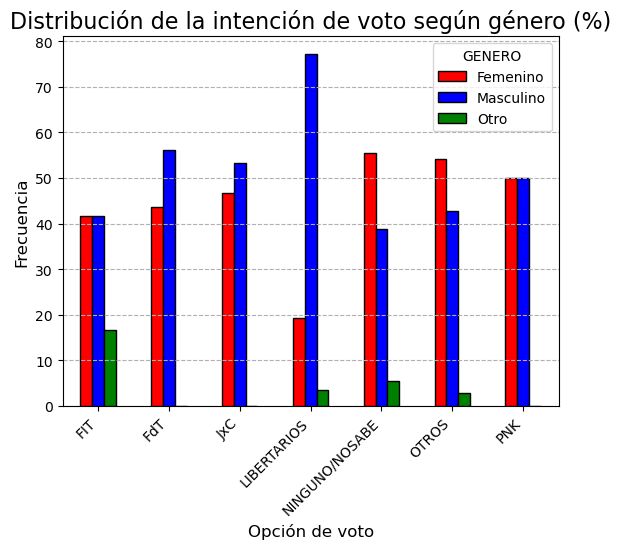

In [154]:
#Gráfico de barras porcentual para género
plt.figure(figsize=(10, 6))
voto_genero_porcentaje.plot(kind='bar', color=('red', 'blue', 'green'), edgecolor='black')
plt.title('Distribución de la intención de voto según género (%)', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

In [218]:
import scipy.stats as st

#Chi Cuadrado entre Intención de voto por espacio y Género
chi_genero = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['GENERO'])
chi2, p, dof, expected = st.chi2_contingency(chi_genero)

print(f"Chi-cuadrado: {chi2}, p-valor: {p}")
print(expected)

Chi-cuadrado: 39.377584997848146, p-valor: 9.11709745688659e-05
[[ 5.32258065  6.38709677  0.29032258]
 [35.48387097 42.58064516  1.93548387]
 [39.91935484 47.90322581  2.17741935]
 [25.28225806 30.33870968  1.37903226]
 [31.93548387 38.32258065  1.74193548]
 [15.52419355 18.62903226  0.84677419]
 [11.53225806 13.83870968  0.62903226]]


In [99]:
#Distribución de intención de voto según grupo etario
voto_edad = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['EDAD']) 
print(voto_edad)

EDAD                   16 a 25  26 a 35  36 a 45  46 a 55  56 y mas
INT DE VOTO X ESPACIO                                              
FIT                          1        5        4        1         1
FdT                          7       13       23       13        24
JxC                          7        9       22       20        32
LIBERTARIOS                  7       12       16       10        12
NINGUNO/NOSABE               6       11       16       19        20
OTROS                        0        5        8       17         5
PNK                          0        6       10        3         7


In [134]:
#Distribución de intención de voto según grupo etario (% al interior de cada espacio)
voto_edad_porcentaje = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['EDAD'], normalize='index')*100
print(voto_edad_porcentaje)

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     8.333333  41.666667  33.333333   8.333333   8.333333
FdT                     8.750000  16.250000  28.750000  16.250000  30.000000
JxC                     7.777778  10.000000  24.444444  22.222222  35.555556
LIBERTARIOS            12.280702  21.052632  28.070175  17.543860  21.052632
NINGUNO/NOSABE          8.333333  15.277778  22.222222  26.388889  27.777778
OTROS                   0.000000  14.285714  22.857143  48.571429  14.285714
PNK                     0.000000  23.076923  38.461538  11.538462  26.923077


<Figure size 1000x600 with 0 Axes>

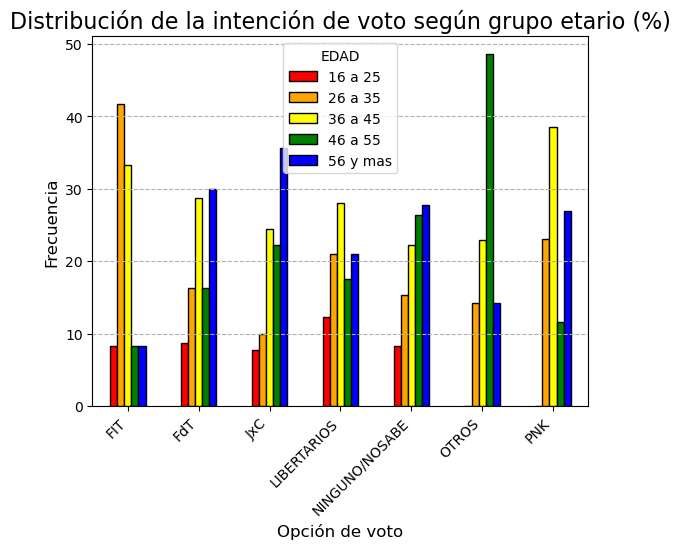

In [168]:
#Gráfico de barras porcentual para grupo etario
plt.figure(figsize=(10, 6))
voto_edad_porcentaje.plot(kind='bar', color=("red", "orange", "yellow", "green", "blue", "purple"), edgecolor='black')
plt.title('Distribución de la intención de voto según grupo etario (%)', fontsize=16)
plt.ylabel('Frecuencia', fontsize=12)
plt.xlabel('Opción de voto', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')

In [216]:
#Chi Cuadrado entre Intención de voto por espacio y Edad
chi_edad = pd.crosstab(df['INT DE VOTO X ESPACIO'], df['EDAD'])
chi2, p, dof, expected = st.chi2_contingency(chi_edad)

print(f"Chi-cuadrado: {chi2}, p-valor: {p}")
print(expected)

Chi-cuadrado: 40.42369073238307, p-valor: 0.019250431661207743
[[ 0.90322581  1.96774194  3.19354839  2.67741935  3.25806452]
 [ 6.02150538 13.11827957 21.29032258 17.84946237 21.72043011]
 [ 6.77419355 14.75806452 23.9516129  20.08064516 24.43548387]
 [ 4.29032258  9.34677419 15.16935484 12.71774194 15.47580645]
 [ 5.41935484 11.80645161 19.16129032 16.06451613 19.5483871 ]
 [ 2.6344086   5.73924731  9.31451613  7.80913978  9.50268817]
 [ 1.95698925  4.26344086  6.91935484  5.80107527  7.05913978]]


In [176]:
#Mapeo de densidad según edad
mapa = folium.Map(location=[-32.9468, -60.6393], zoom_start=12)
categorias = df['EDAD'].unique()

#Creamos una capa por categoría:
for categoria in categorias:
    mapa_edad = df[df['EDAD'] == categoria]
    coordenadas = mapa_edad[['Coord1__Latitude', 'Coord1__Longitude']].values.tolist()
    capa = folium.FeatureGroup(name=f"Edad: {categoria}")
    HeatMap(coordenadas).add_to(capa)
    capa.add_to(mapa)

# Agregamos un control de capas
folium.LayerControl().add_to(mapa)

# Guardamos el mapa como archivo HTML
mapa.save("C:\\Users\\palom\\Downloads\\mapa_densidad_edad.html")

print("Mapa de densidad con filtros por edad creado. Ábrelo con un navegador.")

Mapa de densidad con filtros por edad creado. Ábrelo con un navegador.


In [181]:
#¿CORRELACION DE PODRÍA HACIENDOLAS NUMERICAS? A MI NO ME SALIO. 
#FALTA BUSCAR DATOS SECUNDARIOS COMO NIVEL DE ESTUDIOS